In [87]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from glob import glob
from skimage.registration import phase_cross_correlation


### Read and process in data

In [4]:
import imageio # welcome to bmp file land
path = '/Users/chris/Desktop/uf_grad_school/obs_tech/spectroscopy-lab/pepito_star_spectra/'
ne_lamp1 = imageio.imread(path+'ne_lamp_1s.bmp')
ne_lamp2 = imageio.imread(path+'ne_lamp_1s_2.bmp')
ne_lamp = np.median(np.array(np.stack((ne_lamp1, ne_lamp2))), axis=0) # stack the two images and take median
#print(ne_lamp)
#print(ne_lamp.shape)

hg_lamp1 = imageio.imread(path+'hg_lamp_1-sixteenth_s.bmp') 
hg_lamp2 = imageio.imread(path+'hg_lamp_1-sixteenth_s_2.bmp')
hg_lamp = np.median(np.array(np.stack((hg_lamp1, hg_lamp2))), axis=0) # stack the two images and take median

kr_lamp1 = imageio.imread(path+'kr_lamp_p6.bmp')
kr_lamp2 = imageio.imread(path+'kr_lamp_p6_2.bmp')
kr_lamp = np.median(np.array(np.stack((kr_lamp1, kr_lamp2))), axis=0) # stack the two images and take median

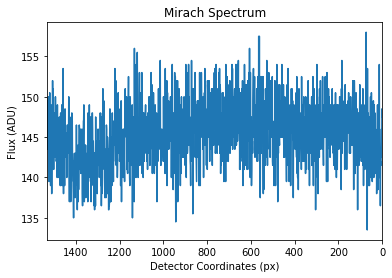

In [127]:
# now let's do the darks and flats
def stack_and_median(files):
    file_names = glob(files)
    images = []
    og = imageio.imread(np.sort(file_names)[0])
    for i in range(len(file_names)):
        image = imageio.imread(np.sort(file_names)[i])       
        images.append(image)
    im_array = np.array(images)
    return np.median(1.0*im_array, axis=0)
    
def stack_median_shift(files):
    file_names = glob(files)
    images = []
    og = imageio.imread(np.sort(file_names)[0])
    for i in range(len(file_names)):
        image = imageio.imread(np.sort(file_names)[i])
        # calculate shift for each image relative to first
        pcc = phase_cross_correlation(og, image)
        print(pcc[0])
        # apply shift
        og += np.roll(image, [int(shift) for shift in pcc[0]], axis=(0,1))
        #images.append(image)
    #im_array = np.array(images)
    #return np.median(1.0*im_array, axis=0)
    return og

mirach = stack_and_median(path+'aldebaran_3s_*.bmp')
#mirach = stack_and_median(path+'mirach_8s_*.bmp')
#mirach1 = stack_median_shift(path+'deneb_3s_13.63g_*.bmp')
mirach_rect1 = mirach1[355:539,:]
mirach_collapsed1 = np.median(mirach_rect1, axis=0)
plt.plot(detector_loc, mirach_collapsed1)
plt.xlim([1530, 0])
plt.xlabel('Detector Coordinates (px)')
plt.ylabel('Flux (ADU)')
plt.title('Mirach Spectrum')
plt.show()

In [47]:
# now let's do the darks and flats
def stack_and_median(files):
    file_names = glob(files)
    images = []
    og = imageio.imread(np.sort(file_names)[0])
    for i in range(len(file_names)):
        image = imageio.imread(np.sort(file_names)[i])
        # calculate shift for each image relative to first
        pcc = phase_cross_correlation(og, image)
        # apply shift
        
        images.append(image)
    im_array = np.array(images)
    return np.median(1.0*im_array, axis=0)

# okay, stack all ten for reals
og = visual_band_ims_norm[0]
for i in range(len(visual_band_ims_norm)):
    # calculate shift for each image relative to first
    pcc = phase_cross_correlation(og, visual_band_ims_norm[i])
    #print(pcc[0])
    # apply shift; list comprehension is bc PCC outputs floats, not ints
    og += np.roll(visual_band_ims_norm[i], [int(shift) for shift in pcc[0]], axis=(0,1))
plt.imshow(og)
plt.colorbar()
plt.ylim([600, 550]) # to keep things oriented the same as full CCD image
plt.xlim([900, 950])
plt.show()

dark1p16 = stack_and_median(path+'dark_1d16s_*.bmp')
#print(dark1p16, dark1p16.shape)

dark1p94 = stack_and_median(path+'dark_1d94s_*.bmp')
#print(dark1p94)

dark1 = stack_and_median(path+'dark_1s_*.bmp')

dark20p5 = stack_and_median(path+'dark_20p5s_*.bmp')

dark30 = stack_and_median(path+'dark_30s_*.bmp')

dark3 = stack_and_median(path+'dark_3s_*.bmp')

dark8 = stack_and_median(path+'dark_8s_*.bmp')

darkp6 = stack_and_median(path+'dark_p6s_*.bmp')

flats = dark30 = stack_and_median(path+'flat_20p5s_*.bmp')
flats_norm = flats-dark20p5
print(flats)
print(flats_norm)

[[150.  155.5 198.  ... 249.5  69.5  99.5]
 [ 89.5  53.  218.  ... 159.5  83.5  55.5]
 [165.5 255.   79.  ...  46.5  95.5  95. ]
 ...
 [109.   42.   61.  ...  53.   91.   76.5]
 [104.5  62.5  48.  ...  51.5 183.5 210. ]
 [ 89.  137.   54.  ...  43.5 205.5  76.5]]
[[ -1.   -1.5  -7.  ...  -3.5   2.5  -2.5]
 [ -3.5   1.   -3.  ...  -2.5   0.5   3.5]
 [ -4.5   0.    5.  ...   1.5  -1.5   0. ]
 ...
 [ -9.   -2.   -2.  ...   4.    0.   -1.5]
 [ -6.5   3.5   3.  ...  -0.5  -0.5  -1. ]
 [  2.  -11.    6.  ...   0.5   3.5  -1.5]]


In [48]:
# dark subtraction and flat division for lamps
kr_lamp_norm = (kr_lamp - darkp6)
#print(kr_lamp_norm, kr_lamp_norm.shape)
#print(kr_lamp_norm/flats)
kr_lamp_norm = kr_lamp_norm/flats
hg_lamp_norm = (hg_lamp - dark1p16)/flats
ne_lamp_norm = (ne_lamp - dark1)/flats
print(ne_lamp_norm)

[[0.06666667 0.06109325 0.05555556 ... 0.01603206 0.1294964  0.05527638]
 [0.13407821 0.20754717 0.03440367 ... 0.00626959 0.10778443 0.08108108]
 [0.04229607 0.0254902  0.12025316 ... 0.1827957  0.07329843 0.05789474]
 ...
 [0.02752294 0.1547619  0.09016393 ... 0.0754717  0.08241758 0.09803922]
 [0.03349282 0.064      0.05208333 ... 0.11650485 0.02179837 0.02619048]
 [0.05617978 0.05474453 0.10185185 ... 0.20689655 0.04379562 0.05882353]]


In [70]:
# dark subtraction and flat division for stars
mirach_norm = (mirach - dark8)/flats
deneb_norm = (deneb - dark3)/flats
aldebaran_norm = (aldebaran - dark3)/flats

### Wavelength calibration

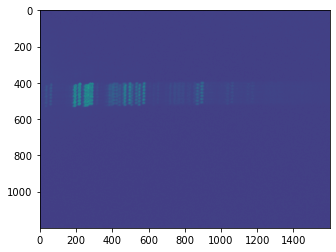

In [51]:
plt.figure()
plt.imshow((ne_lamp_norm))
plt.show()

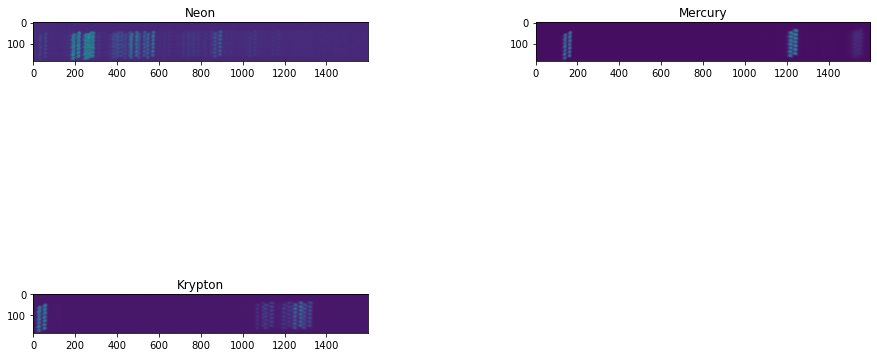

In [67]:
fig, axes = plt.subplots(figsize=(15,10))
#lamps = [ne_lamp_norm, hg_lamp_norm, kr_lamp_norm]
#stars = [mirach_norm, deneb_norm, aldebaran_norm]
plt.subplot(221)
plt.title('Neon')
ne_rect = ne_lamp_norm[355:539,:]
plt.imshow(ne_rect)

plt.subplot(222)
plt.title('Mercury')
hg_rect = hg_lamp_norm[355:539,:]
plt.imshow(hg_rect)

plt.subplot(223)
plt.title('Krypton')
kr_rect = kr_lamp_norm[355:539,:]
plt.imshow(kr_rect)

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

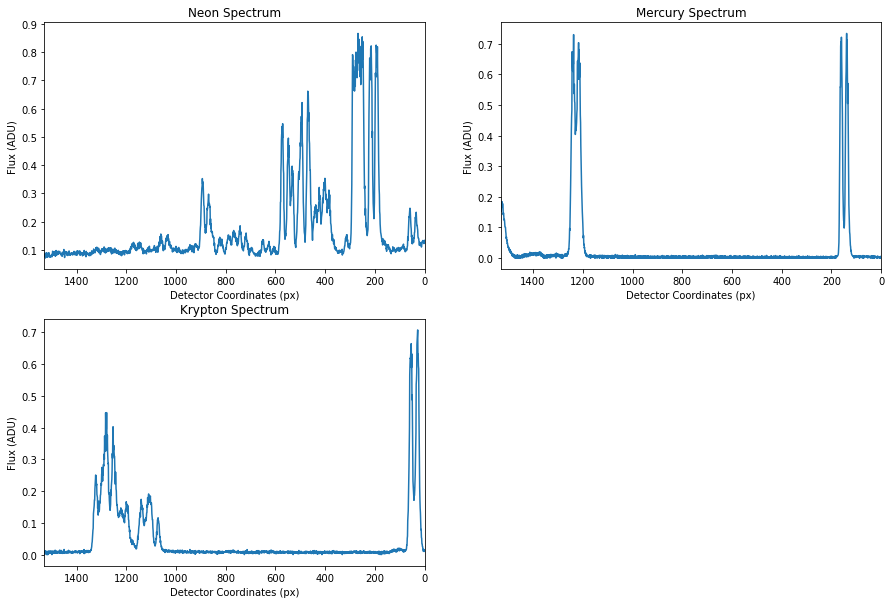

In [80]:
%matplotlib inline
fig, axes = plt.subplots(figsize=(15,10))
plt.subplot(221)
#plt.figure()
plt.plot(detector_loc, ne_collapsed)
plt.xlim([1530, 0])
plt.xlabel('Detector Coordinates (px)')
plt.ylabel('Flux (ADU)')
plt.title('Neon Spectrum')

plt.subplot(222)
#plt.figure()
plt.plot(detector_loc, hg_collapsed)
plt.xlim([1530, 0])
plt.xlabel('Detector Coordinates (px)')
plt.ylabel('Flux (ADU)')
plt.title('Mercury Spectrum')

plt.subplot(223)
#plt.figure()
plt.plot(detector_loc, kr_collapsed)
plt.xlim([1530, 0])
plt.xlabel('Detector Coordinates (px)')
plt.ylabel('Flux (ADU)')
plt.title('Krypton Spectrum')
plt.show()

In [ ]:
def get_line_centroid(x_bounds, detector_px, flux):
    indcs = (detector_px > x_bounds[0]) & (detector_px < x_bounds[1])  # get the indices where we're in between the specified bounds
    x_i, m_i = detector_px[indcs], flux[indcs]  # apply the indices to our detector location and flux arrays
    return sum(x_i * m_i) / sum(m_i)  # return the centroid (flux weighted center-of-mass of the line)

print(f'{get_line_centroid([902, 908], detector_loc, hg_collapsed):.2f}')

In [ ]:
print(f'{get_line_centroid([50, 70], detector_loc, ne_rect1_dark):.2f}') # rightmost line
print(f'{get_line_centroid([200, 230], detector_loc, ne_rect1_dark):.2f}') # big ol line
print(f'{get_line_centroid([260, 297], detector_loc, ne_rect1_dark):.2f}') # other big ol line
print(f'{get_line_centroid([403, 417], detector_loc, ne_rect1_dark):.2f}') # doublet 
print(f'{get_line_centroid([417, 428], detector_loc, ne_rect1_dark):.2f}') # doublet
print(f'{get_line_centroid([450, 477], detector_loc, ne_rect1_dark):.2f}')
print(f'{get_line_centroid([480, 508], detector_loc, ne_rect1_dark):.2f}')
print(f'{get_line_centroid([519, 545], detector_loc, ne_rect1_dark):.2f}')
print(f'{get_line_centroid([559, 587], detector_loc, ne_rect1_dark):.2f}')
print(f'{get_line_centroid([878, 905], detector_loc, ne_rect1_dark):.2f}')
print(f'{get_line_centroid([1045, 1079], detector_loc, ne_rect1_dark):.2f}')


### Stellar spectra

In [ ]:
from skimage.registration import phase_cross_correlation
print(phase_cross_correlation(visual_band_ims_norm[0], visual_band_ims_norm[1]))

In [100]:
# read and median combine the stars
mirach = stack_and_median(path+'mirach_8s_*.bmp')
deneb = stack_and_median(path+'deneb_3s_13.63g_*.bmp')
aldebaran = stack_and_median(path+'aldebaran_3s_*.bmp')

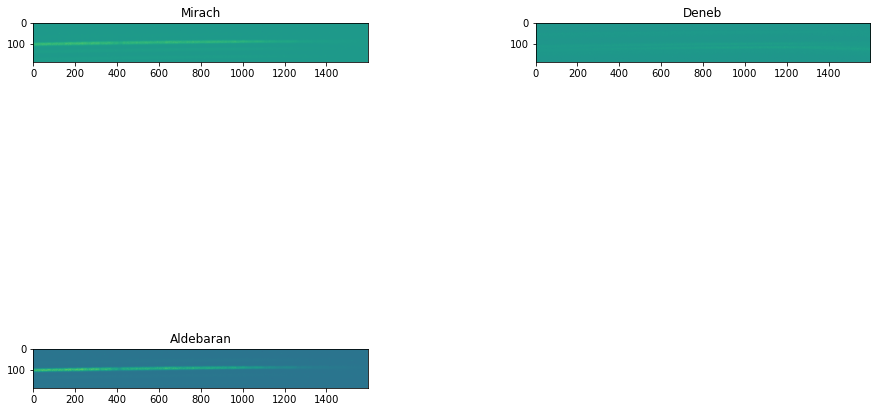

In [85]:
fig, axes = plt.subplots(figsize=(15,10))
#lamps = [ne_lamp_norm, hg_lamp_norm, kr_lamp_norm]
#stars = [mirach_norm, deneb_norm, aldebaran_norm]
plt.subplot(221)
plt.title('Mirach')
mirach_rect = mirach_norm[355:539,:]
plt.imshow(mirach_rect)

plt.subplot(222)
plt.title('Deneb')
deneb_rect = deneb_norm[355:539,:]
plt.imshow(deneb_rect)

plt.subplot(223)
plt.title('Aldebaran')
aldebaran_rect = aldebaran_norm[355:539,:]
plt.imshow(aldebaran_rect)

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

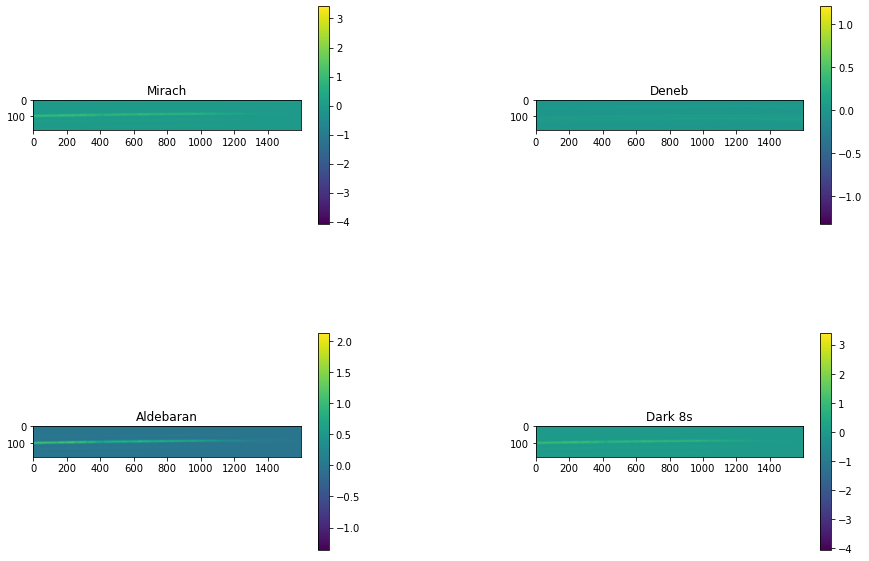

In [120]:
fig, axes = plt.subplots(figsize=(15,10))
#lamps = [ne_lamp_norm, hg_lamp_norm, kr_lamp_norm]
#stars = [mirach_norm, deneb_norm, aldebaran_norm]
plt.subplot(221)
plt.title('Mirach')
mirach_rect = mirach_norm[355:539,:]
plt.imshow(mirach_rect)
plt.colorbar()

plt.subplot(222)
plt.title('Deneb')
deneb_rect = deneb_norm[355:539,:]
plt.imshow(deneb_rect)
plt.colorbar()

plt.subplot(223)
plt.title('Aldebaran')
aldebaran_rect = aldebaran_norm[355:539,:]
plt.imshow(aldebaran_rect)
plt.colorbar()

plt.subplot(224)
plt.title('Dark 8s')
plt.imshow(((mirach-dark8)/flats)[355:539,:])

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.colorbar()
plt.show()

In [121]:
ne_collapsed = np.median(ne_rect, axis=0)
hg_collapsed = np.median(hg_rect, axis=0)
kr_collapsed = np.median(kr_rect, axis=0)
mirach_collapsed = np.median(mirach_rect, axis=0)
deneb_collapsed = np.median(deneb_rect, axis=0)
aldebaran_collapsed = np.median(aldebaran_rect, axis=0)
detector_loc = np.arange(len(ne_collapsed))

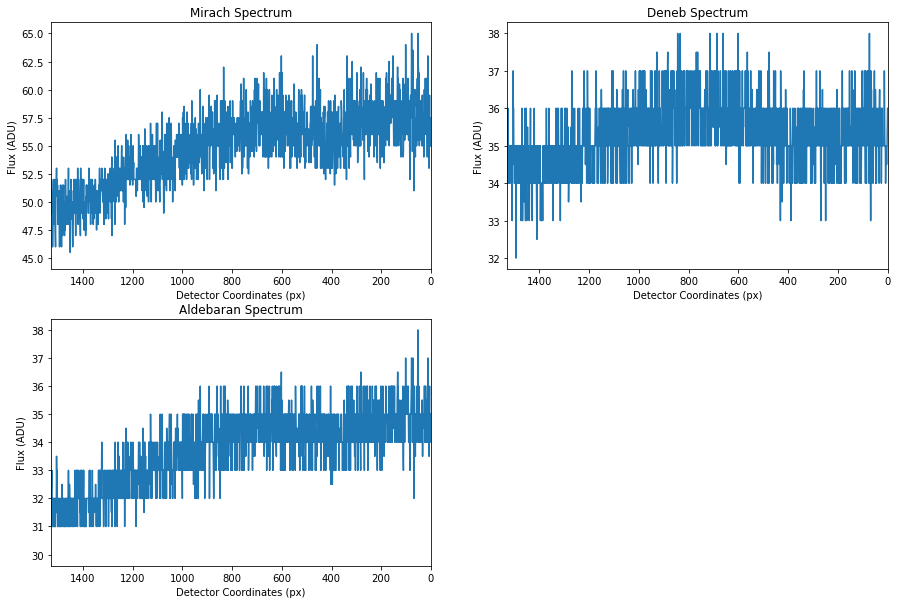

In [118]:
fig, axes = plt.subplots(figsize=(15,10))
plt.subplot(221)
#plt.figure()
plt.plot(detector_loc, mirach_collapsed)
plt.xlim([1530, 0])
plt.xlabel('Detector Coordinates (px)')
plt.ylabel('Flux (ADU)')
plt.title('Mirach Spectrum')

plt.subplot(222)
#plt.figure()
plt.plot(detector_loc, deneb_collapsed)
plt.xlim([1530, 0])
plt.xlabel('Detector Coordinates (px)')
plt.ylabel('Flux (ADU)')
plt.title('Deneb Spectrum')

plt.subplot(223)
#plt.figure()
plt.plot(detector_loc, aldebaran_collapsed)
plt.xlim([1530, 0])
plt.xlabel('Detector Coordinates (px)')
plt.ylabel('Flux (ADU)')
plt.title('Aldebaran Spectrum')
plt.show()

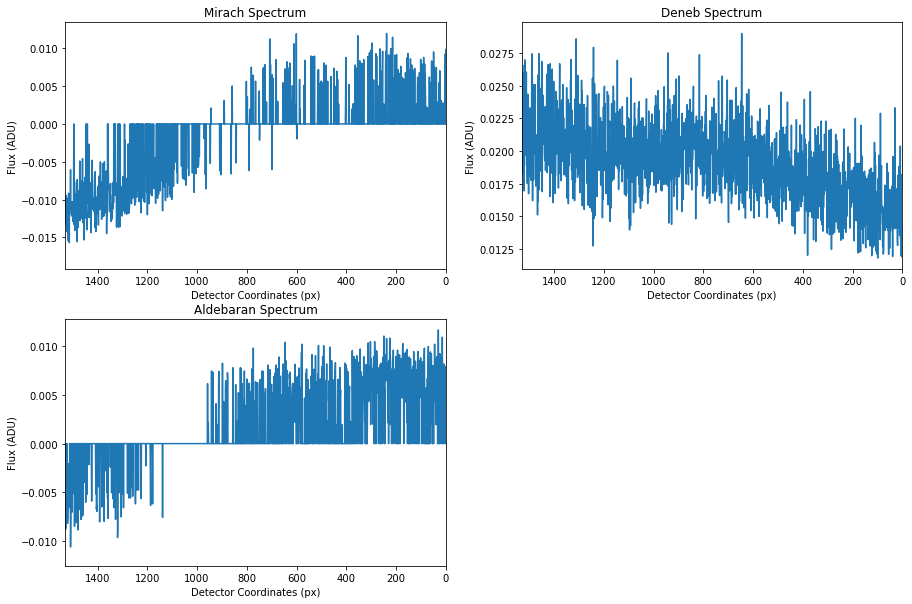

In [122]:
fig, axes = plt.subplots(figsize=(15,10))
plt.subplot(221)
#plt.figure()
plt.plot(detector_loc, mirach_collapsed)
plt.xlim([1530, 0])
plt.xlabel('Detector Coordinates (px)')
plt.ylabel('Flux (ADU)')
plt.title('Mirach Spectrum')

plt.subplot(222)
#plt.figure()
plt.plot(detector_loc, deneb_collapsed)
plt.xlim([1530, 0])
plt.xlabel('Detector Coordinates (px)')
plt.ylabel('Flux (ADU)')
plt.title('Deneb Spectrum')

plt.subplot(223)
#plt.figure()
plt.plot(detector_loc, aldebaran_collapsed)
plt.xlim([1530, 0])
plt.xlabel('Detector Coordinates (px)')
plt.ylabel('Flux (ADU)')
plt.title('Aldebaran Spectrum')
plt.show()